<a href="https://colab.research.google.com/github/lyj12h/ai_m/blob/main/Bigdataclass_logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
# Load data
# The first two columns contains the exam scores and the third column
# contains the label.

data = np.loadtxt('ex2data1.txt', delimiter=',')
X, y = data[:, 0:2], data[:, 2]

In [3]:
pos = np.where(y==1)
neg = np.where(y==0)

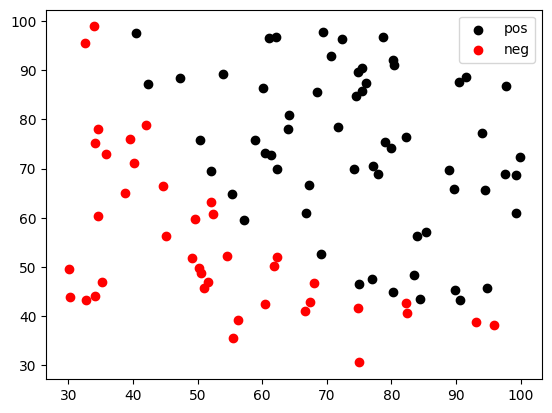

In [4]:
pyplot.scatter(X[pos, 0], X[pos, 1], c='black')
pyplot.scatter(X[neg, 0], X[neg, 1], c='red')
pyplot.legend(['pos', 'neg'])

In [5]:
def plotData(X, y):
    # Create New Figure
    fig = pyplot.figure()

    # ====================== YOUR CODE HERE ======================
    pos = np.where(y==1)
    neg = np.where(y==0)

    pyplot.scatter(X[pos, 0], X[pos, 1], c='black')
    pyplot.scatter(X[neg, 0], X[neg, 1], c='red')
    pyplot.legend(['pos', 'neg'])
    # ============================================================

In [6]:
def sigmoid(z):
    # convert input to a numpy array
    z = np.array(z)

    # You need to return the following variables correctly
    g = np.zeros(z.shape)

    # ====================== YOUR CODE HERE ======================
    g = 1/(1+np.exp(-z))
    # =============================================================
    return g

In [7]:
# Test the implementation of sigmoid function here
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [8]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [33]:
grad.shape

(3,)

In [25]:
def costFunction(theta, X, y):
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly
    J = 0
    grad = np.zeros(theta.shape)

    # ====================== YOUR CODE HERE ======================
    y_hat=np.dot(X,theta)
    J = 1/m * np.sum(-y*np.log(sigmoid(y_hat))-(1-y)*np.log(1-sigmoid(y_hat)))
    error=sigmoid(y_hat)-y
    grad = 1/m * np.dot(error,X)
    # =============================================================
    return J, grad

In [26]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]



In [27]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


In [28]:
# set options for optimize.minimize
options= {'maxiter': 400}

res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


<ipython-input-28-f4105ff9dcce>:4: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,


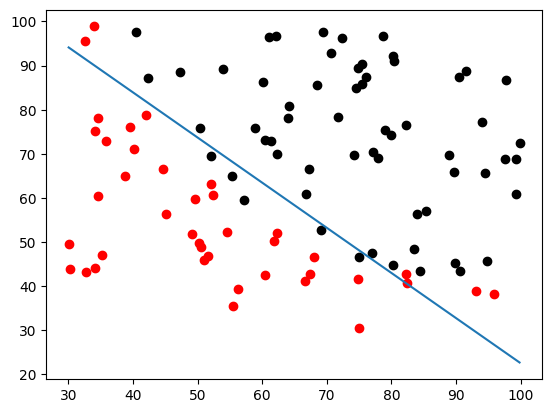

In [29]:
# 실행
plot_x = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
pyplot.plot(plot_x, plot_y)
pyplot.scatter(X[pos, 1], X[pos, 2], c='black')
pyplot.scatter(X[neg, 1], X[neg, 2], c='red')

In [30]:
#  Predict probability for a student with score 45 on exam 1
#  and score 85 on exam 2
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

For a student with scores 45 and 85,we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002

